## CS331 Neural Computing Coursework
### u1615413

In this coursework we're asked construct, implement and examine a simple 3-layer MLP ANN to represent the XOR problem. Unlike common binary operators, XOR is not linearly seperable, meaning a 3-layer perception is required in order to solve this problem.

I'll be using Python's `keras` and `jupyter` to form the ANN and document my progress.

Our first step however, is to generate noisy training sets for this problem. There are only 4 distinct in/outputs for the XOR problem, these being;

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 1       | 0       | 1      |
| 0       | 1       | 1      |
| 0       | 0       | 0      |
| 1       | 1       | 0      |

We'll define these possible combinations, and add Gaussian noise independently to each row/column. For each of our datasets, we'll save them to a local `pickle` store so they can be read and used within the ANN script. For our first question we're asked to use training set sizes of 16, 32 and 64. We'll double this, and use the other half as our validation data.

In [10]:
import pandas as pd
import numpy as np
import pickle

#Possibilities of input/output for XOR
poss = [[1, 0, 1],
        [0, 1, 1],
        [1, 1, 0],
        [0, 0, 0]]

#Final size of training dataset
for num in [16, 32, 64]:
    size = num
    dataset = pd.DataFrame(columns=["in_1", "in_2", "out"])


    c=0
    for ex in poss:
        for p in range(size//4):
            dataset.loc[c] = ex
            c+=1

    #Adding gaussian noise to input/output
    #range(3) to include output, range(2) for just input cols
    for i in range(2):
        mu, sigma = 0, 0.5
        noise = np.random.normal(mu, sigma, size)
        dataset.iloc[:,i] += noise

    f = open('training_datastore'+str(num)+'.pckl', 'wb')
    pickle.dump(dataset, f)
    f.close()

#Constructing test dataset seperately
size = 64
dataset = pd.DataFrame(columns=["in_1", "in_2", "out"])

c=0
for ex in poss:
    for p in range(size//4):
        dataset.loc[c] = ex
        c+=1

#Adding gaussian noise to input/output
#range(3) to include output, range(2) for just input cols
for i in range(2):
    mu, sigma = 0, 0.5
    noise = np.random.normal(mu, sigma, size)
    dataset.iloc[:,i] += noise

f = open('testing_datastore'+str(num)+'.pckl', 'wb')
pickle.dump(dataset, f)
f.close()

Now, we'll import our data and ready it for input into our MLP. Defining the testing dataset seperately means not only that results become repeatable (since we aren't relying on a random function to define our training/test dataset split), but also we can have a fixed size test set for each of our training set sizes - meaning results across the sizes are more consistent. 

In [11]:
import pickle
from sklearn.model_selection import train_test_split

#Load input data (in this case of size 64)
f = open('training_datastore64.pckl', 'rb')
train_data = pickle.load(f)
f.close()

#Prepare data for model (train/test sets)
X_train = train_data[["in_1", "in_2"]]
y_train = train_data["out"]

#Now load testing data
f = open('testing_datastore64.pckl', 'rb')
test_data = pickle.load(f)
f.close()

#Prepare data for model (train/test sets)
X_test = test_data[["in_1", "in_2"]]
y_test = test_data["out"]

Now we can define our MLP using `keras`. We only require `Dense` (fully connected layers). Note, that in `keras` layers are defined as "weight layers", meaning we need only define 2 weight layers for 3 neuron layers.

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

#Define model
model = Sequential([
    Dense(2, input_dim=2, activation=tf.keras.activations.sigmoid),
    Dense(1, activation=tf.keras.activations.sigmoid)
    ])

sgd = SGD(lr=0.1)
model.compile(loss = 'mean_squared_error',
              optimizer = sgd)

Above, we've defined a 2-2-1 MLP network, using MSE loss and RMSprop as an optimiser. We also have sigmoid activation in the hidden and output layer as required. We're using Stochastic Gradient Descent (SGD) as our optimiser - it's widely considered a simpler alternative to momentum based algorithms such as ADAM or RMSprop.

We'll now fit the model using our training data, and defining our validation datasets to the ones above, using 1000 epochs (meaning we'll iterate over the training data 1000 times building upon our previous weight matrices).

In [13]:
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs = 1000,
                   batch_size = 1)

Train on 64 samples, validate on 64 samples
Epoch 1/1000
64/64 [==============================] - 1s 15ms/sample - loss: 0.2557 - val_loss: 0.2520
Epoch 2/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2526 - val_loss: 0.2517
Epoch 3/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2523 - val_loss: 0.2513
Epoch 4/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2514 - val_loss: 0.2513
Epoch 5/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2520 - val_loss: 0.2511
Epoch 6/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2516 - val_loss: 0.2511
Epoch 7/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2514 - val_loss: 0.2510
Epoch 8/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2508 - val_loss: 0.2510
Epoch 9/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2509 - val_loss: 0.2511
Epoch 10/1000
64/64 [===========

64/64 [==============================] - 0s 1ms/sample - loss: 0.2353 - val_loss: 0.2449
Epoch 80/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2382 - val_loss: 0.2437
Epoch 81/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2375 - val_loss: 0.2428
Epoch 82/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2375 - val_loss: 0.2433
Epoch 83/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2370 - val_loss: 0.2423
Epoch 84/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2362 - val_loss: 0.2421
Epoch 85/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2376 - val_loss: 0.2421
Epoch 86/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2370 - val_loss: 0.2419
Epoch 87/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2347 - val_loss: 0.2433
Epoch 88/1000
64/64 [==============================] - 0s 968us/sample - lo

64/64 [==============================] - 0s 1000us/sample - loss: 0.2257 - val_loss: 0.2279
Epoch 158/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2257 - val_loss: 0.2285
Epoch 159/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2261 - val_loss: 0.2273
Epoch 160/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2256 - val_loss: 0.2261
Epoch 161/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2255 - val_loss: 0.2266
Epoch 162/1000
64/64 [==============================] - 0s 953us/sample - loss: 0.2249 - val_loss: 0.2277
Epoch 163/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2249 - val_loss: 0.2257
Epoch 164/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2246 - val_loss: 0.2259
Epoch 165/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2242 - val_loss: 0.2248
Epoch 166/1000
64/64 [==============================] - 0s 92

Epoch 235/1000
64/64 [==============================] - 0s 994us/sample - loss: 0.2171 - val_loss: 0.2184
Epoch 236/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2169 - val_loss: 0.2180
Epoch 237/1000
64/64 [==============================] - 0s 992us/sample - loss: 0.2154 - val_loss: 0.2173
Epoch 238/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2170 - val_loss: 0.2178
Epoch 239/1000
64/64 [==============================] - 0s 979us/sample - loss: 0.2145 - val_loss: 0.2218
Epoch 240/1000
64/64 [==============================] - 0s 963us/sample - loss: 0.2160 - val_loss: 0.2179
Epoch 241/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2166 - val_loss: 0.2176
Epoch 242/1000
64/64 [==============================] - 0s 953us/sample - loss: 0.2161 - val_loss: 0.2172
Epoch 243/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2166 - val_loss: 0.2177
Epoch 244/1000
64/64 [==========================

64/64 [==============================] - 0s 922us/sample - loss: 0.2140 - val_loss: 0.2194
Epoch 313/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2131 - val_loss: 0.2212
Epoch 314/1000
64/64 [==============================] - 0s 977us/sample - loss: 0.2145 - val_loss: 0.2207
Epoch 315/1000
64/64 [==============================] - 0s 953us/sample - loss: 0.2141 - val_loss: 0.2185
Epoch 316/1000
64/64 [==============================] - 0s 941us/sample - loss: 0.2140 - val_loss: 0.2179
Epoch 317/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2139 - val_loss: 0.2177
Epoch 318/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2127 - val_loss: 0.2203
Epoch 319/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2140 - val_loss: 0.2198
Epoch 320/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2121 - val_loss: 0.2223
Epoch 321/1000
64/64 [==============================] - 0s 2ms/sample -

Epoch 390/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2129 - val_loss: 0.2187
Epoch 391/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2129 - val_loss: 0.2185
Epoch 392/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2118 - val_loss: 0.2189
Epoch 393/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2114 - val_loss: 0.2182
Epoch 394/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2126 - val_loss: 0.2177
Epoch 395/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2215
Epoch 396/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2119 - val_loss: 0.2190
Epoch 397/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2112 - val_loss: 0.2181
Epoch 398/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2125 - val_loss: 0.2198
Epoch 399/1000
64/64 [==============================] - 0s 1000u

64/64 [==============================] - 0s 1ms/sample - loss: 0.2109 - val_loss: 0.2191
Epoch 469/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2113 - val_loss: 0.2192
Epoch 470/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2117 - val_loss: 0.2198
Epoch 471/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2118 - val_loss: 0.2205
Epoch 472/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2110 - val_loss: 0.2194
Epoch 473/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2115 - val_loss: 0.2213
Epoch 474/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2115 - val_loss: 0.2203
Epoch 475/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2183
Epoch 476/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2110 - val_loss: 0.2213
Epoch 477/1000
64/64 [==============================] - 0s 1ms/sample - 

64/64 [==============================] - 0s 961us/sample - loss: 0.2107 - val_loss: 0.2227
Epoch 547/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2116 - val_loss: 0.2216
Epoch 548/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2106 - val_loss: 0.2200
Epoch 549/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2112 - val_loss: 0.2206
Epoch 550/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2095 - val_loss: 0.2233
Epoch 551/1000
64/64 [==============================] - 0s 962us/sample - loss: 0.2113 - val_loss: 0.2222
Epoch 552/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2110 - val_loss: 0.2204
Epoch 553/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2103 - val_loss: 0.2222
Epoch 554/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2111 - val_loss: 0.2206
Epoch 555/1000
64/64 [==============================] - 0s 968us/sample

64/64 [==============================] - 0s 1ms/sample - loss: 0.2103 - val_loss: 0.2220
Epoch 625/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2108 - val_loss: 0.2222
Epoch 626/1000
64/64 [==============================] - 0s 946us/sample - loss: 0.2107 - val_loss: 0.2214
Epoch 627/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2107 - val_loss: 0.2221
Epoch 628/1000
64/64 [==============================] - 0s 982us/sample - loss: 0.2093 - val_loss: 0.2198
Epoch 629/1000
64/64 [==============================] - 0s 953us/sample - loss: 0.2108 - val_loss: 0.2204
Epoch 630/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2106 - val_loss: 0.2201
Epoch 631/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2102 - val_loss: 0.2210
Epoch 632/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2098 - val_loss: 0.2223
Epoch 633/1000
64/64 [==============================] - 0s 962us/sa

64/64 [==============================] - 0s 1000us/sample - loss: 0.2104 - val_loss: 0.2217
Epoch 703/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2100 - val_loss: 0.2205
Epoch 704/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2106 - val_loss: 0.2210
Epoch 705/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2106 - val_loss: 0.2210
Epoch 706/1000
64/64 [==============================] - 0s 986us/sample - loss: 0.2088 - val_loss: 0.2240
Epoch 707/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2108 - val_loss: 0.2232
Epoch 708/1000
64/64 [==============================] - 0s 994us/sample - loss: 0.2101 - val_loss: 0.2239
Epoch 709/1000
64/64 [==============================] - 0s 998us/sample - loss: 0.2105 - val_loss: 0.2222
Epoch 710/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2108 - val_loss: 0.2209
Epoch 711/1000
64/64 [==============================] - 0s 1ms/sa

64/64 [==============================] - 0s 953us/sample - loss: 0.2103 - val_loss: 0.2218
Epoch 781/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2093 - val_loss: 0.2205
Epoch 782/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2100 - val_loss: 0.2204
Epoch 783/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2098 - val_loss: 0.2204
Epoch 784/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2103 - val_loss: 0.2220
Epoch 785/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2098 - val_loss: 0.2208
Epoch 786/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2089 - val_loss: 0.2231
Epoch 787/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2098 - val_loss: 0.2232
Epoch 788/1000
64/64 [==============================] - 0s 996us/sample - loss: 0.2098 - val_loss: 0.2237
Epoch 789/1000
64/64 [==============================] - 0s 984us/sampl

64/64 [==============================] - 0s 1ms/sample - loss: 0.2084 - val_loss: 0.2225
Epoch 859/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2093 - val_loss: 0.2227
Epoch 860/1000
64/64 [==============================] - 0s 1000us/sample - loss: 0.2096 - val_loss: 0.2231
Epoch 861/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2228
Epoch 862/1000
64/64 [==============================] - 0s 968us/sample - loss: 0.2097 - val_loss: 0.2204
Epoch 863/1000
64/64 [==============================] - 0s 984us/sample - loss: 0.2094 - val_loss: 0.2223
Epoch 864/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2098 - val_loss: 0.2204
Epoch 865/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2100 - val_loss: 0.2211
Epoch 866/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2090 - val_loss: 0.2198
Epoch 867/1000
64/64 [==============================] - 0s 980us/samp

64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2224
Epoch 937/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2098 - val_loss: 0.2216
Epoch 938/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2096 - val_loss: 0.2220
Epoch 939/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2076 - val_loss: 0.2204
Epoch 940/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2079 - val_loss: 0.2236
Epoch 941/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2210
Epoch 942/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2094 - val_loss: 0.2222
Epoch 943/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2099 - val_loss: 0.2216
Epoch 944/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2097 - val_loss: 0.2205
Epoch 945/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0

Now our model has been trained, we can look between the ranges x,y ∈ [0,1] to visualise the effectiveness of this model in solving the XOR problem. Note, we should see black (0) areas around (0,0) and (1,1), and white around (0,1) and (1,0). What the model predicts between these areas is reliant on the noise within the training data.

We'll plot this data using `plotnine` (a module which allows use of ggplot) with granularity 0.01, which allows us to see the predicted value of our model for 10,000 values within our unit square.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


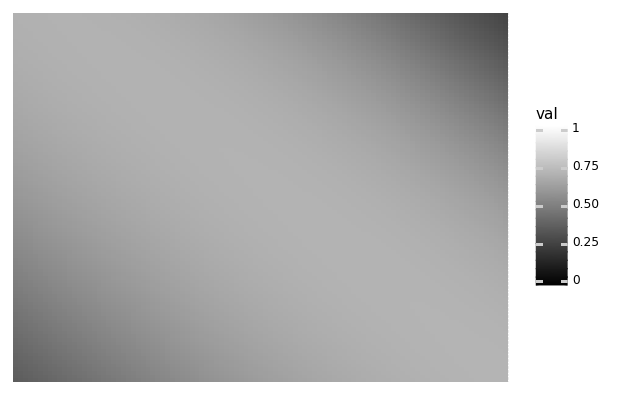

<ggplot: (-9223371897079044110)>


In [14]:
from plotnine import *
results = pd.DataFrame(columns=['x', 'y', 'val'])

c=0
for x in np.arange(0, 1.01, 0.01):
    for y in np.arange(0, 1.01, 0.01):
        out = model.predict(np.array([x, y],).reshape(1,2))[0][0]
        results.loc[c] = [x, y, out]
        
        c+=1

p = ggplot(results, 
       aes("factor(x)", "factor(y)", fill="val")) + geom_tile(aes(width=1.0, height=1.0)) + scale_fill_gradient(low="#000000", high="#ffffff", limits=[0,1]) + scale_x_discrete(name='') + scale_y_discrete(name='') + theme(axis_text_x = element_blank(),
                                                                                                                                                                                                  axis_text_y = element_blank(),
                                                                                                                                                                                                  axis_ticks = element_blank())
print(p)

From the above, we can see that we've been successful in modelling the function, although in areas where the model is unsure of the output; around (0.5, 0.5), it has assumed a value of 0. This is only a single example (of 9) which are asked within the assignment. We must iterate over hidden layer sizes 2, 4 8 and training set sizes of 16, 32 and 64.

We can quickly analyse all these architectures by running a grid search, and adding our findings to a `pandas` dataframe for later analysis. `ggplot`'s `facet_grid` lets us compare combinations of the above variables. Below are the heat maps for all architectures.

The following code constructs our grid, and adds findings to `results`.

In [16]:
results = pd.DataFrame(columns=['x', 'y', 'val', 'neuron_num', 'sample_size'])
histories = pd.DataFrame(columns=['neuron_num', 'sample_size', 'train_hist', 'val_hist'])
c=0
ind = 0

#Now load testing data (same for each model)
f = open('testing_datastore64.pckl', 'rb')
test_data = pickle.load(f)
f.close()

#Prepare data for model (test sets)
X_test = test_data[["in_1", "in_2"]]
y_test = test_data["out"]

for neuron_num in [2, 4, 8]:
    for sample_size in [16, 32, 64]:
        #Load input data
        f = open('training_datastore'+str(sample_size)+'.pckl', 'rb')
        train_data = pickle.load(f)
        f.close()

        #Prepare data for model (train/test sets)
        X_train = train_data[["in_1", "in_2"]]
        y_train = train_data["out"]

        #Define model
        model = Sequential([
            Dense(neuron_num, input_dim=2, activation=tf.keras.activations.sigmoid),
            Dense(1, activation=tf.keras.activations.sigmoid)
            ])

        sgd = SGD(lr=0.1)
        model.compile(loss = 'mean_squared_error',
                      optimizer = sgd)

        result = model.fit(X_train, y_train,
                           validation_data=(X_test, y_test),
                           epochs = 1000,
                           batch_size = 1,
                           verbose=0)
        
        #Keeping track of loss and validation loss for graphs
        histories.loc[ind] = [neuron_num, sample_size, result.history['loss'], result.history['val_loss']]
        ind += 1
        
        for x in np.arange(0, 1, 0.01):
            for y in np.arange(0, 1, 0.01):
                out = model.predict(np.array([x, y],).reshape(1,2))[0][0]
                results.loc[c] = [x, y, out, neuron_num, sample_size]
                
                c+=1

results.to_csv('results.csv')
histories.to_csv('histories.csv')

From these results, it's simple to facet by the archtecture shapes.

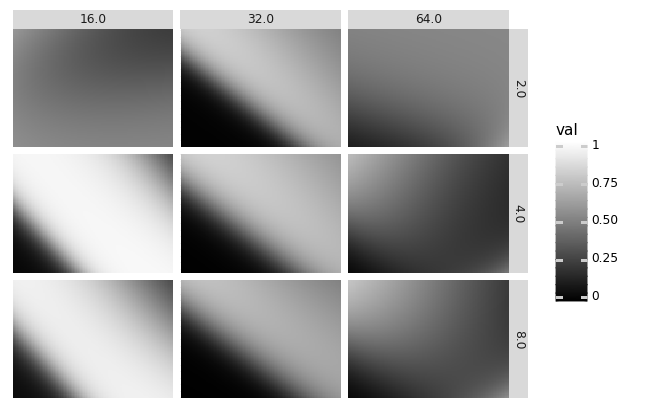

<ggplot: (139775730952)>


In [17]:
results = pd.read_csv('results.csv')
p = (ggplot(results, aes("factor(x)", "factor(y)", fill="val"))
     + geom_tile()
     + scale_fill_gradient(low="#000000", high="#ffffff", limits=[0,1])
     + scale_x_discrete(name='')
     + scale_y_discrete(name='')
     + theme(axis_text_x = element_blank(), axis_text_y = element_blank(), axis_ticks = element_blank())
     + facet_grid('neuron_num ~ sample_size'))

print(p)


      neuron_num  sample_size  epoch     train       val
0            2.0         16.0    0.0  0.259376  0.266822
1            2.0         16.0    1.0  0.254225  0.263752
2            2.0         16.0    2.0  0.251360  0.261721
3            2.0         16.0    3.0  0.249048  0.260907
4            2.0         16.0    4.0  0.248215  0.260320
5            2.0         16.0    5.0  0.247184  0.260165
6            2.0         16.0    6.0  0.246701  0.260146
7            2.0         16.0    7.0  0.246393  0.260169
8            2.0         16.0    8.0  0.246090  0.260259
9            2.0         16.0    9.0  0.245782  0.260244
10           2.0         16.0   10.0  0.245453  0.260399
11           2.0         16.0   11.0  0.245329  0.260588
12           2.0         16.0   12.0  0.245060  0.260827
13           2.0         16.0   13.0  0.244654  0.261104
14           2.0         16.0   14.0  0.244560  0.261372
15           2.0         16.0   15.0  0.244689  0.261571
16           2.0         16.0  

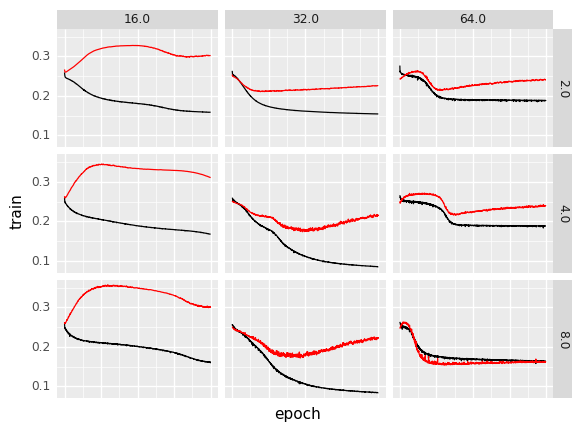

<ggplot: (-9223371897076900436)>


In [9]:
import ast
histories = pd.read_csv('histories.csv')
performs = pd.DataFrame(columns=["neuron_num", "sample_size", "epoch", "train", "val"])

c=0
for index, row in histories.iterrows():
    for epoch in range(0,1000):
        performs.loc[c] = [row["neuron_num"], row["sample_size"], epoch, ast.literal_eval(row["train_hist"])[epoch], ast.literal_eval(row["val_hist"])[epoch]]
        c+=1

print(performs)
g = (ggplot(performs)
     + geom_line(aes("epoch", "train"))
     + geom_line(aes("epoch", "val"), colour="#ff0000")
     #+ scale_x_continous(name='')
     + theme(axis_text_x = element_blank(), axis_ticks = element_blank())
     + facet_grid('neuron_num ~ sample_size'))

print(g)